In [ ]:
#retirando dados do csv
import pandas as pd

file_path = 'COLOQUE O CAMINHO DO CSV ANTIGO'
data = pd.read_csv(file_path)

data = data[data['COLUNA'] != 'DADO PARA RETIRAR']

new_file_path = 'COLOQUE O CAMINHO DO CSV NOVO'
data.to_csv(new_file_path, index=False)

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

file_path = 'Data/Sleep_health_and_lifestyle.csv'
dataBase = pd.read_csv(file_path)

dataBase.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,none
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,none
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,none
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


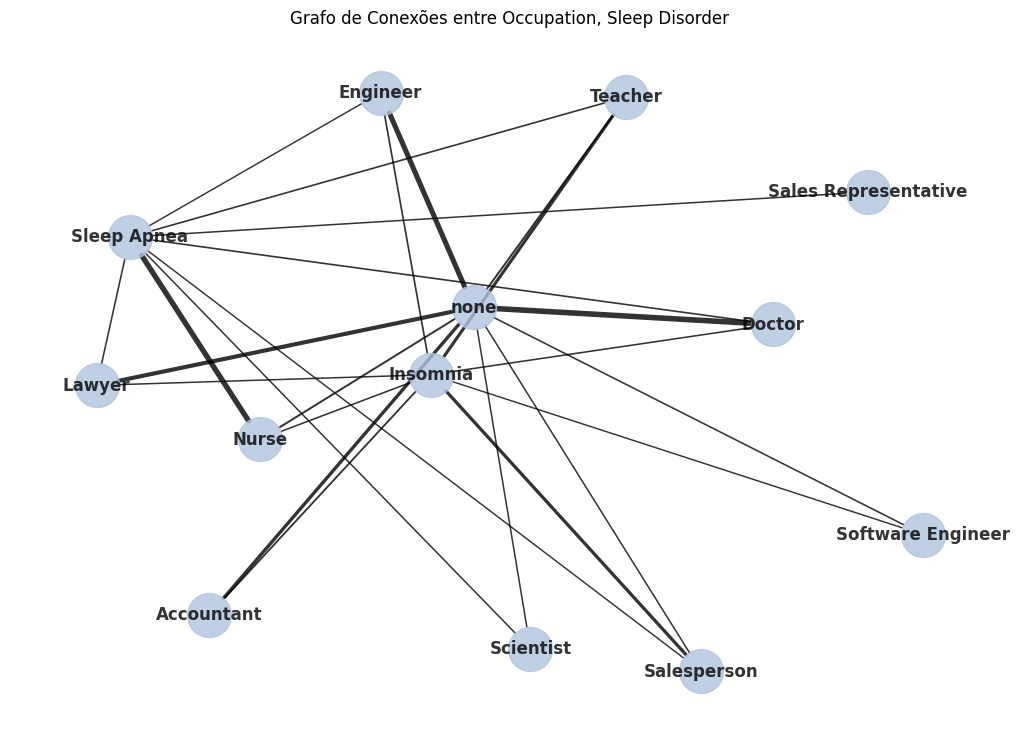

In [15]:
#Grafo de ocupação com disturbio do sono
grafoDeAnalise = nx.Graph()

grafoDeAnalise.add_nodes_from(dataBase['Occupation'])
grafoDeAnalise.add_nodes_from(dataBase['Sleep Disorder'])

ContaConexões = {}
for edge in zip(dataBase['Occupation'], dataBase['Sleep Disorder']):
    ContaConexões[edge] = ContaConexões.get(edge, 0) + 1

for edge, count in ContaConexões.items():
    grafoDeAnalise.add_edge(edge[0], edge[1], weight=count)

edge_weights = [grafoDeAnalise[u][v]['weight'] for u, v in grafoDeAnalise.edges()]
max_weight = max(edge_weights)
edge_widths = [1 + 3 * (weight / max_weight) for weight in edge_weights]

plt.figure(figsize=(10, 7))
pos = nx.fruchterman_reingold_layout(grafoDeAnalise, k=5)
nx.draw(grafoDeAnalise, pos, with_labels=True, node_size=1000, node_color='lightsteelblue', font_weight='bold', font_size=12, alpha=0.8,width=edge_widths, edge_color='black', arrows=True)
#edge_labels = nx.get_edge_attributes(grafoDeAnalise, 'weight')
#nx.draw_networkx_edge_labels(grafoNivelDeEstesse, pos, edge_labels=edge_labels)
plt.title('Grafo de Conexões entre Occupation, Sleep Disorder')
plt.show()


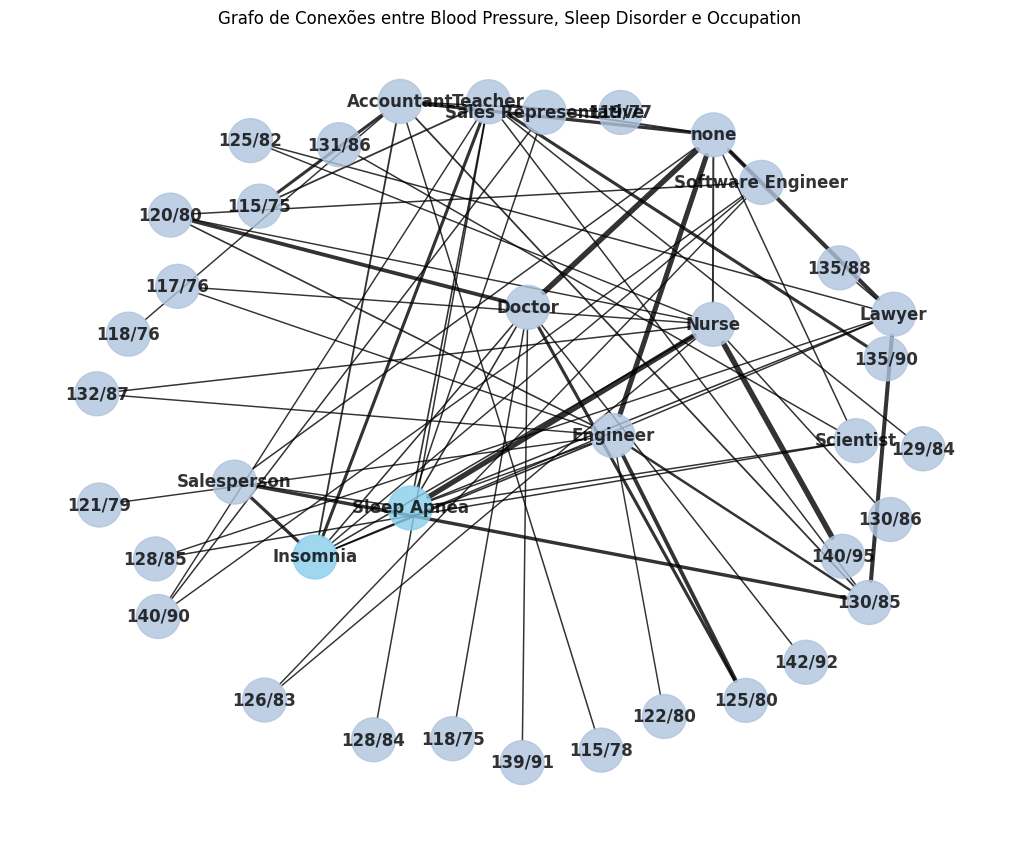

In [16]:
#Disturbios e pressão com ocupação
grafoInitial = nx.Graph()

edges = list(zip(dataBase['Occupation'], dataBase['Sleep Disorder']))
edges += list(zip(dataBase['Occupation'], dataBase['Blood Pressure']))

grafoInitial.add_nodes_from(dataBase['Occupation'])
grafoInitial.add_nodes_from(dataBase['Sleep Disorder'])
grafoInitial.add_nodes_from(dataBase['Blood Pressure'])

countPeople = {}
for edge in edges:
    countPeople[edge] = countPeople.get(edge, 0) + 1

for edge, count in countPeople.items():
    grafoInitial.add_edge(edge[0], edge[1], weight=count)

edge_weights = [grafoInitial[u][v]['weight'] for u, v in grafoInitial.edges()]
max_weight = max(edge_weights)
edge_widths = [1 + 3 * (weight / max_weight) for weight in edge_weights]

plt.figure(figsize=(10, 8))
pos = nx.fruchterman_reingold_layout(grafoInitial, k=5)
node_colors= ['skyblue' if node in ['Insomnia', 'Sleep Apnea', 'None'] else 'lightsteelblue' for node in grafoInitial.nodes()]
nx.draw(grafoInitial, pos, with_labels=True, node_color=node_colors, node_size=1000, font_weight='bold', font_size=12, alpha=0.8, width=edge_widths, edge_color='black', arrows=True)
plt.title('Grafo de Conexões entre Blood Pressure, Sleep Disorder e Occupation')
plt.show()


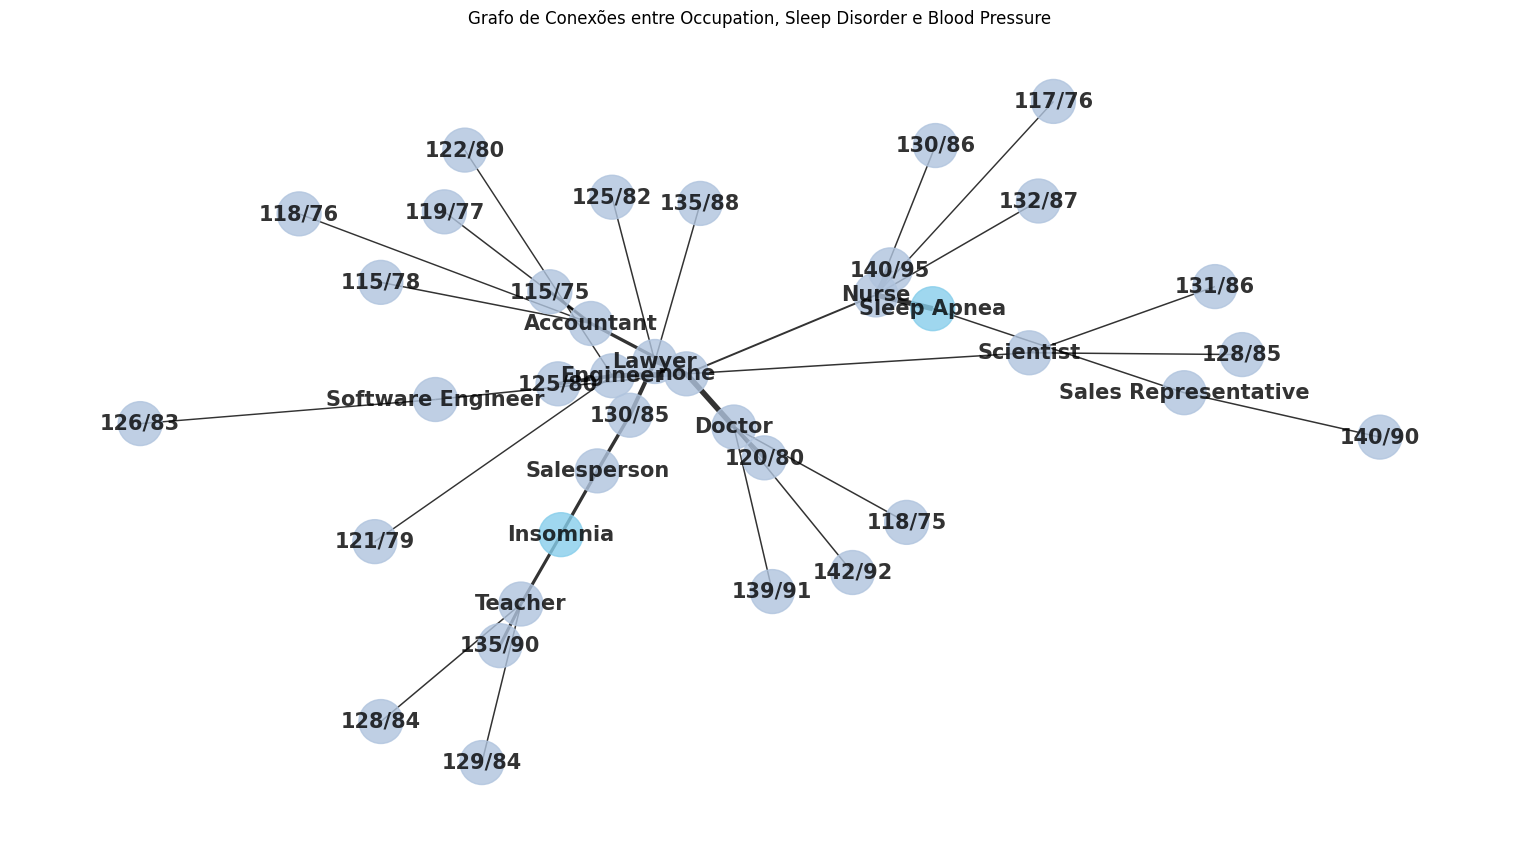

In [17]:
# Arvore geradora maxima
grafoMST = nx.Graph()

edges = list(zip(dataBase['Occupation'], dataBase['Sleep Disorder']))
edges += list(zip(dataBase['Occupation'], dataBase['Blood Pressure']))

grafoMST.add_nodes_from(dataBase['Occupation'])
grafoMST.add_nodes_from(dataBase['Sleep Disorder'])
grafoMST.add_nodes_from(dataBase['Blood Pressure'])

countPeople = {}
# Adiciona pesos às arestas
for edge in edges:
    countPeople[edge] = countPeople.get(edge, 0) + 1

for edge, count in countPeople.items():
    grafoMST.add_edge(edge[0], edge[1], weight=count)


# Criação da árvore maxima de abrangência
treeGeral = nx.maximum_spanning_tree(grafoMST, weight='weight', algorithm='kruskal')


# Visualização da MST
edge_weights = [treeGeral[u][v]['weight'] for u, v in treeGeral.edges()]
max_weight = max(edge_weights)
edge_widths = [1 + 3 * (weight / max_weight) for weight in edge_weights]

node_colors= ['skyblue' if node in ['Insomnia', 'Sleep Apnea', 'None'] else 'lightsteelblue' for node in treeGeral.nodes()]
plt.figure(figsize=(15, 8))
pos = nx.fruchterman_reingold_layout(treeGeral, k=7)
nx.draw(treeGeral, with_labels=True, node_color=node_colors, node_size=1000, font_weight='bold', font_size=15, alpha=0.8, width=edge_widths, edge_color='black', font_color='black')
plt.title('Grafo de Conexões entre Occupation, Sleep Disorder e Blood Pressure')
plt.show()


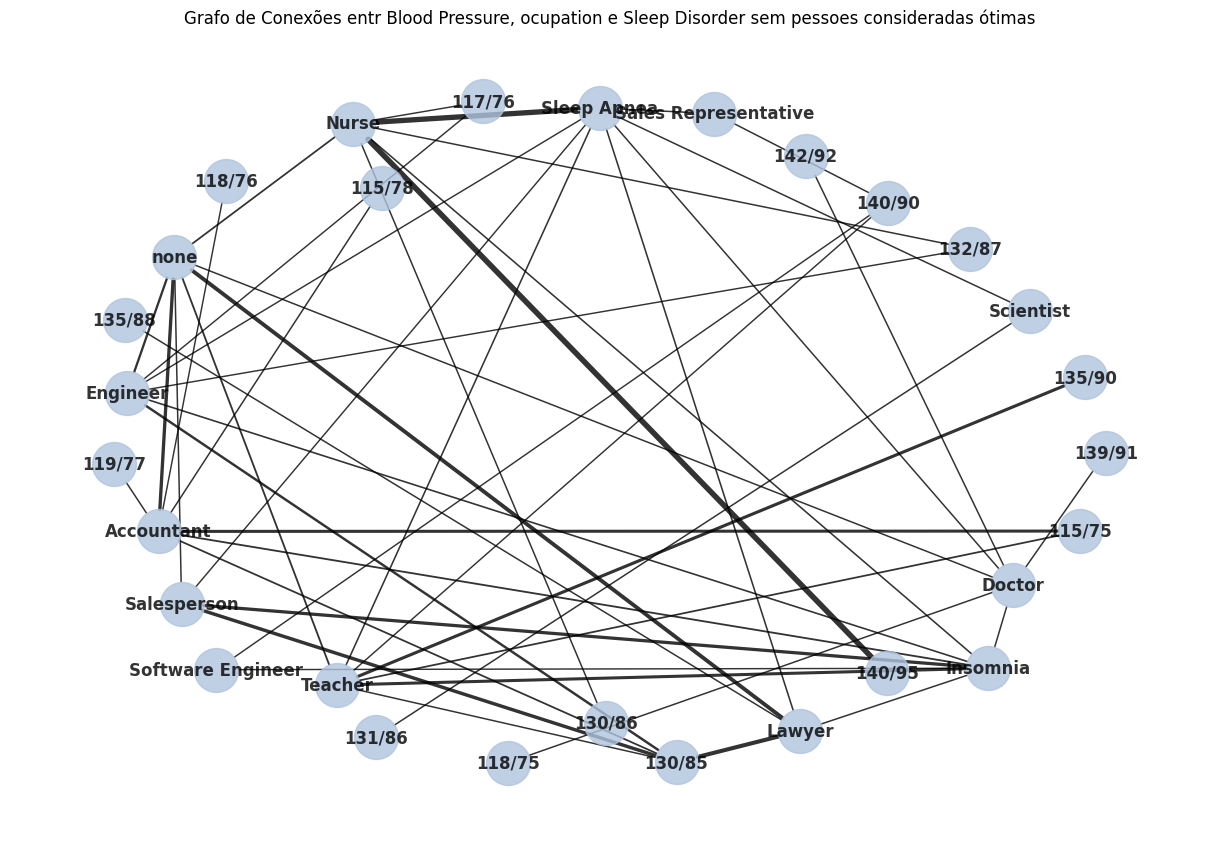

In [18]:
#Sem pressão 120/80
file_path = 'Data/SemPressaoNormal.csv'
SemPressaoPadrao = pd.read_csv(file_path)
grafoSemPressaoNormal = nx.Graph()

edges = list(zip(SemPressaoPadrao['Occupation'], SemPressaoPadrao['Sleep Disorder']))
edges += list(zip(SemPressaoPadrao['Occupation'], SemPressaoPadrao['Blood Pressure']))

grafoSemPressaoNormal.add_nodes_from(SemPressaoPadrao['Occupation'])
grafoSemPressaoNormal.add_nodes_from(SemPressaoPadrao['Sleep Disorder'])
grafoSemPressaoNormal.add_nodes_from(SemPressaoPadrao['Blood Pressure'])

countPeople = {}
for edge in edges:
    countPeople[edge] = countPeople.get(edge, 0) + 1

for edge, count in countPeople.items():
    grafoSemPressaoNormal.add_edge(edge[0], edge[1], weight=count)

edge_weights = [grafoSemPressaoNormal[u][v]['weight'] for u, v in grafoSemPressaoNormal.edges()]
max_weight = max(edge_weights)
edge_widths = [1 + 3 * (weight / max_weight) for weight in edge_weights]

plt.figure(figsize=(12, 8))
pos = nx.fruchterman_reingold_layout(grafoSemPressaoNormal, k=10)
nx.draw(grafoSemPressaoNormal, pos, with_labels=True, node_size=1000, node_color='lightsteelblue', font_weight='bold', font_size=12, alpha=0.8, width=edge_widths, edge_color='black', arrows=True)
#edge_labels = nx.get_edge_attributes(grafoNivelDeEstesse, 'weight')
#nx.draw_networkx_edge_labels(grafoNivelDeEstesse, pos, edge_labels=edge_labels)
plt.title('Grafo de Conexões entr Blood Pressure, ocupation e Sleep Disorder sem pessoes consideradas ótimas')
plt.show()


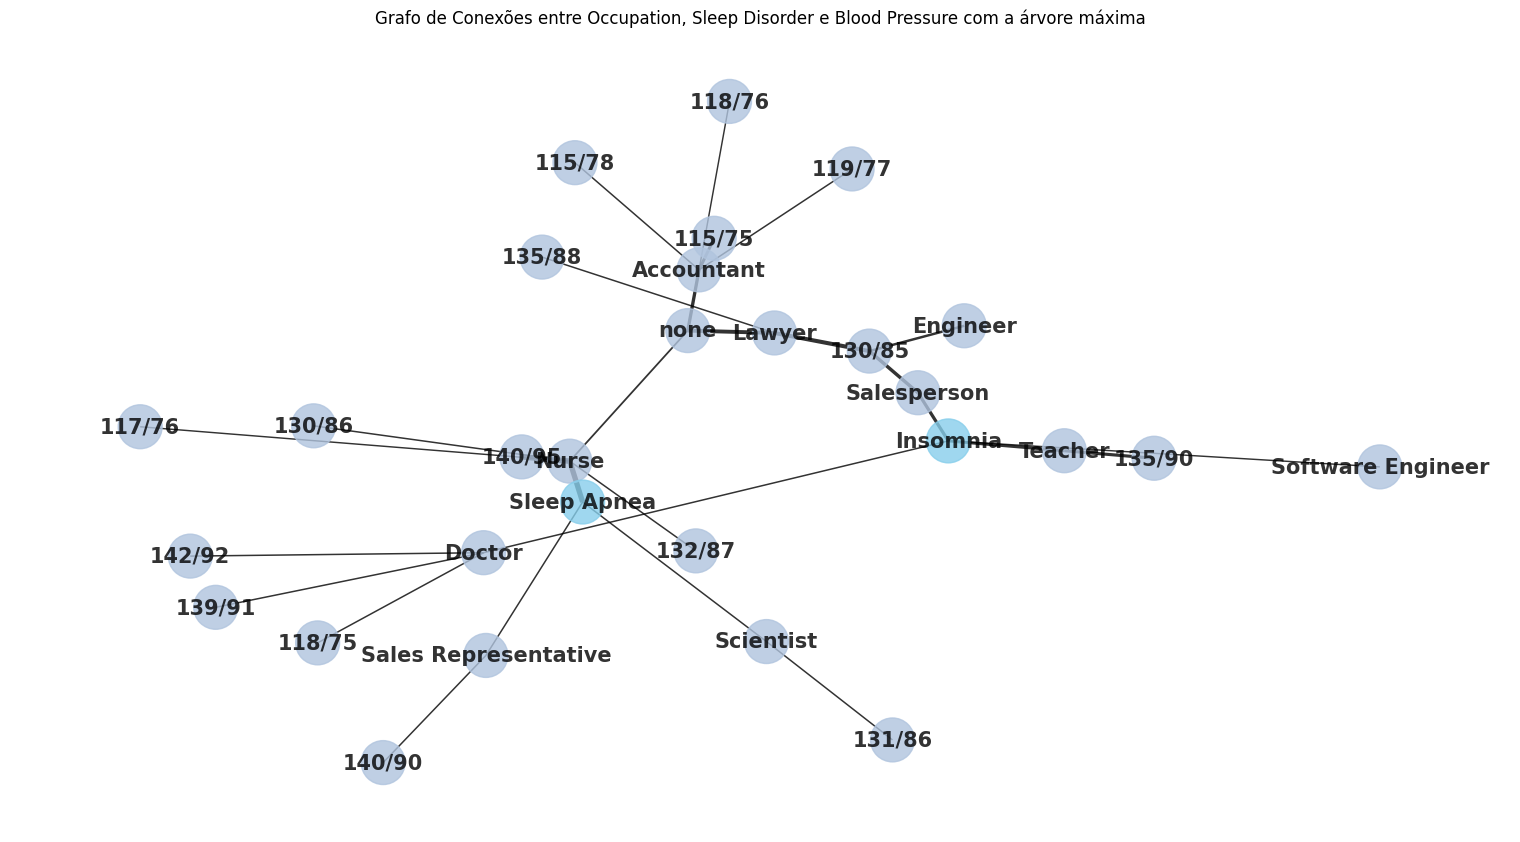

In [19]:
#Arvore sem pressoes 120/80
grafoSemPressaoNormalMST = nx.Graph()

edges = list(zip(SemPressaoPadrao ['Occupation'], SemPressaoPadrao ['Sleep Disorder']))
edges += list(zip(SemPressaoPadrao ['Occupation'], SemPressaoPadrao ['Blood Pressure']))

grafoSemPressaoNormalMST.add_nodes_from(SemPressaoPadrao ['Occupation'])
grafoSemPressaoNormalMST.add_nodes_from(SemPressaoPadrao ['Sleep Disorder'])
grafoSemPressaoNormalMST.add_nodes_from(SemPressaoPadrao ['Blood Pressure'])

countPeople = {}
for edge in edges:
    countPeople[edge] = countPeople.get(edge, 0) + 1

for edge, count in countPeople.items():
    grafoSemPressaoNormalMST.add_edge(edge[0], edge[1], weight=count)

tree = nx.maximum_spanning_tree(grafoSemPressaoNormalMST, algorithm='kruskal')

edge_weights = [tree[u][v]['weight'] for u, v in tree.edges()]
max_weight = max(edge_weights)
edge_widths = [1 + 3 * (weight / max_weight) for weight in edge_weights]

plt.figure(figsize=(15, 8))
pos = nx.fruchterman_reingold_layout(tree, k=5)

node_colors= ['skyblue' if node in ['Insomnia', 'Sleep Apnea', 'None'] else 'lightsteelblue' for node in grafoSemPressaoNormalMST.nodes()]
nx.draw(tree, with_labels=True, node_color=node_colors, node_size=1000, font_weight='bold', font_size=15, alpha=0.8, width=edge_widths, edge_color='black', font_color='black')
plt.title('Grafo de Conexões entre Occupation, Sleep Disorder e Blood Pressure com a árvore máxima')
plt.show()


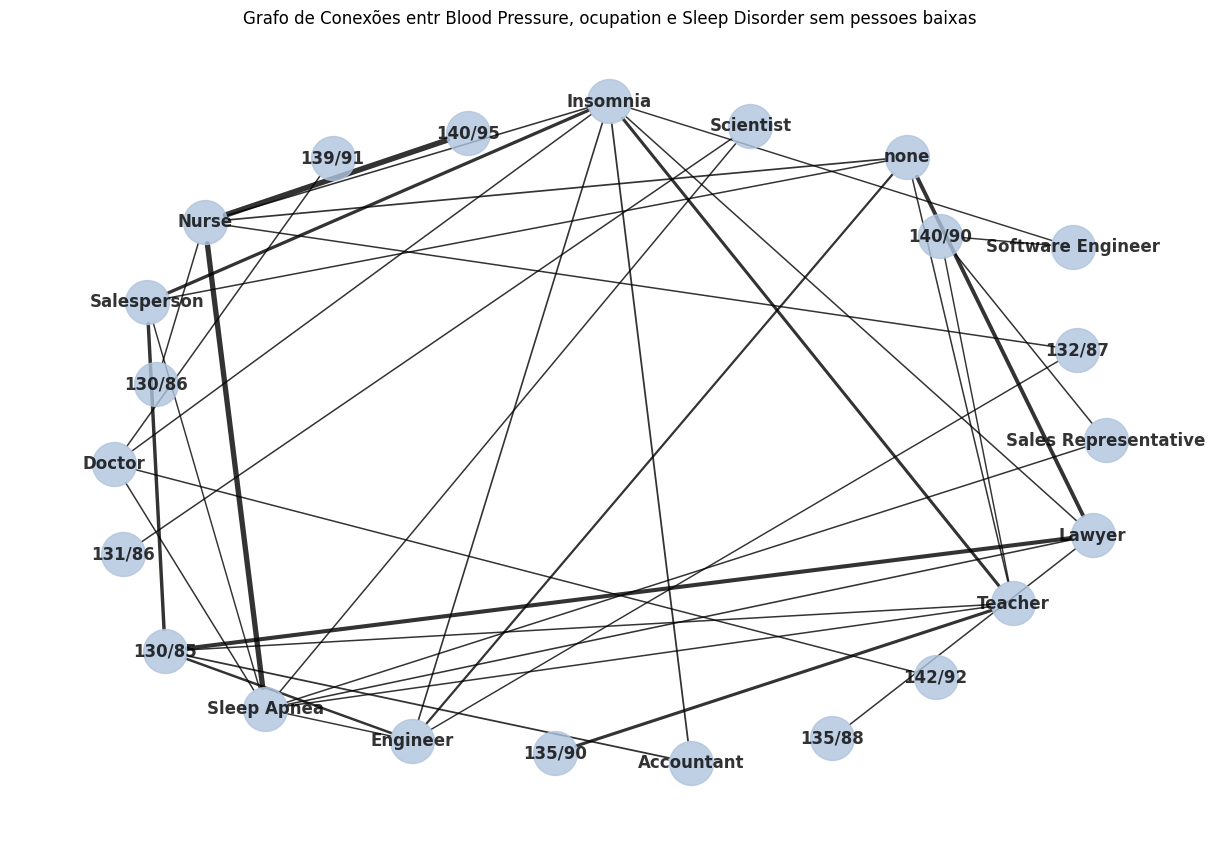

In [12]:
#Sem as pressoes baixas
import networkx as nx
import matplotlib.pyplot as plt

file_path = 'Data/SemPressaoBaixa.csv'
SemPressaoBaixa = pd.read_csv(file_path)
grafoSemPressaoBaixa = nx.Graph()

edges = list(zip(SemPressaoBaixa['Occupation'], SemPressaoBaixa['Sleep Disorder']))
edges += list(zip(SemPressaoBaixa['Occupation'], SemPressaoBaixa['Blood Pressure']))

grafoSemPressaoBaixa.add_nodes_from(SemPressaoBaixa['Occupation'])
grafoSemPressaoBaixa.add_nodes_from(SemPressaoBaixa['Sleep Disorder'])
grafoSemPressaoBaixa.add_nodes_from(SemPressaoBaixa['Blood Pressure'])

countPeople = {}
for edge in edges:
    countPeople[edge] = countPeople.get(edge, 0) + 1

for edge, count in countPeople.items():
    grafoSemPressaoBaixa.add_edge(edge[0], edge[1], weight=count)

edge_weights = [grafoSemPressaoBaixa[u][v]['weight'] for u, v in grafoSemPressaoBaixa.edges()]
max_weight = max(edge_weights)
edge_widths = [1 + 3 * (weight / max_weight) for weight in edge_weights]

plt.figure(figsize=(12, 8))
pos = nx.fruchterman_reingold_layout(grafoSemPressaoBaixa, k=10)
nx.draw(grafoSemPressaoBaixa, pos, with_labels=True, node_size=1000, node_color='lightsteelblue', font_weight='bold', font_size=12, alpha=0.8,width=edge_widths, edge_color='black', arrows=True)
#edge_labels = nx.get_edge_attributes(grafoSemPressaoBaixa, 'weight')
#nx.draw_networkx_edge_labels(grafoSemPressaoBaixa, pos, edge_labels=edge_labels)
plt.title('Grafo de Conexões entr Blood Pressure, ocupation e Sleep Disorder sem pessoes baixas')
plt.show()


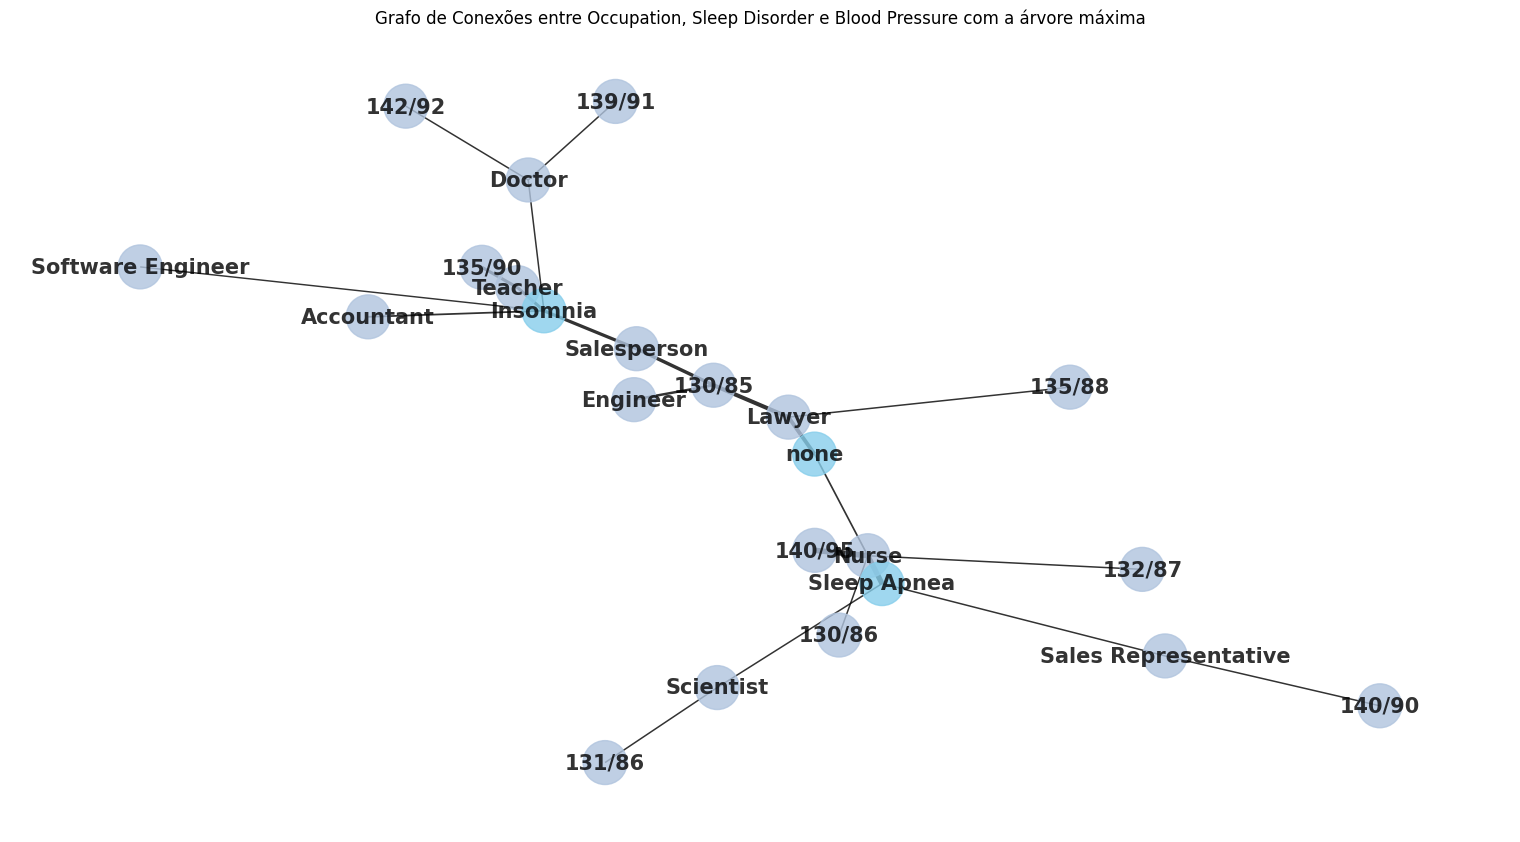

In [20]:
#Arvore sem pressoes baixas
grafoSemPressaoBaixaMST = nx.Graph()

edges = list(zip(SemPressaoBaixa ['Occupation'], SemPressaoBaixa ['Sleep Disorder']))
edges += list(zip(SemPressaoBaixa ['Occupation'], SemPressaoBaixa ['Blood Pressure']))

grafoSemPressaoBaixaMST.add_nodes_from(SemPressaoBaixa ['Occupation'])
grafoSemPressaoBaixaMST.add_nodes_from(SemPressaoBaixa ['Sleep Disorder'])
grafoSemPressaoBaixaMST.add_nodes_from(SemPressaoBaixa ['Blood Pressure'])

countPeople = {}
for edge in edges:
    countPeople[edge] = countPeople.get(edge, 0) + 1

for edge, count in countPeople.items():
    grafoSemPressaoBaixaMST.add_edge(edge[0], edge[1], weight=count)

tree = nx.maximum_spanning_tree(grafoSemPressaoBaixaMST, algorithm='kruskal')

edge_weights = [tree[u][v]['weight'] for u, v in tree.edges()]
max_weight = max(edge_weights)
edge_widths = [1 + 3 * (weight / max_weight) for weight in edge_weights]

plt.figure(figsize=(15, 8))
pos = nx.fruchterman_reingold_layout(tree, k=7)
node_colors= ['skyblue' if node in ['Insomnia', 'Sleep Apnea', 'none'] else 'lightsteelblue' for node in grafoSemPressaoBaixaMST.nodes()]
nx.draw(tree, with_labels=True, node_color=node_colors, node_size=1000, font_weight='bold', font_size=15, alpha=0.8, width=edge_widths, edge_color='black', font_color='black')
plt.title('Grafo de Conexões entre Occupation, Sleep Disorder e Blood Pressure com a árvore máxima')
plt.show()


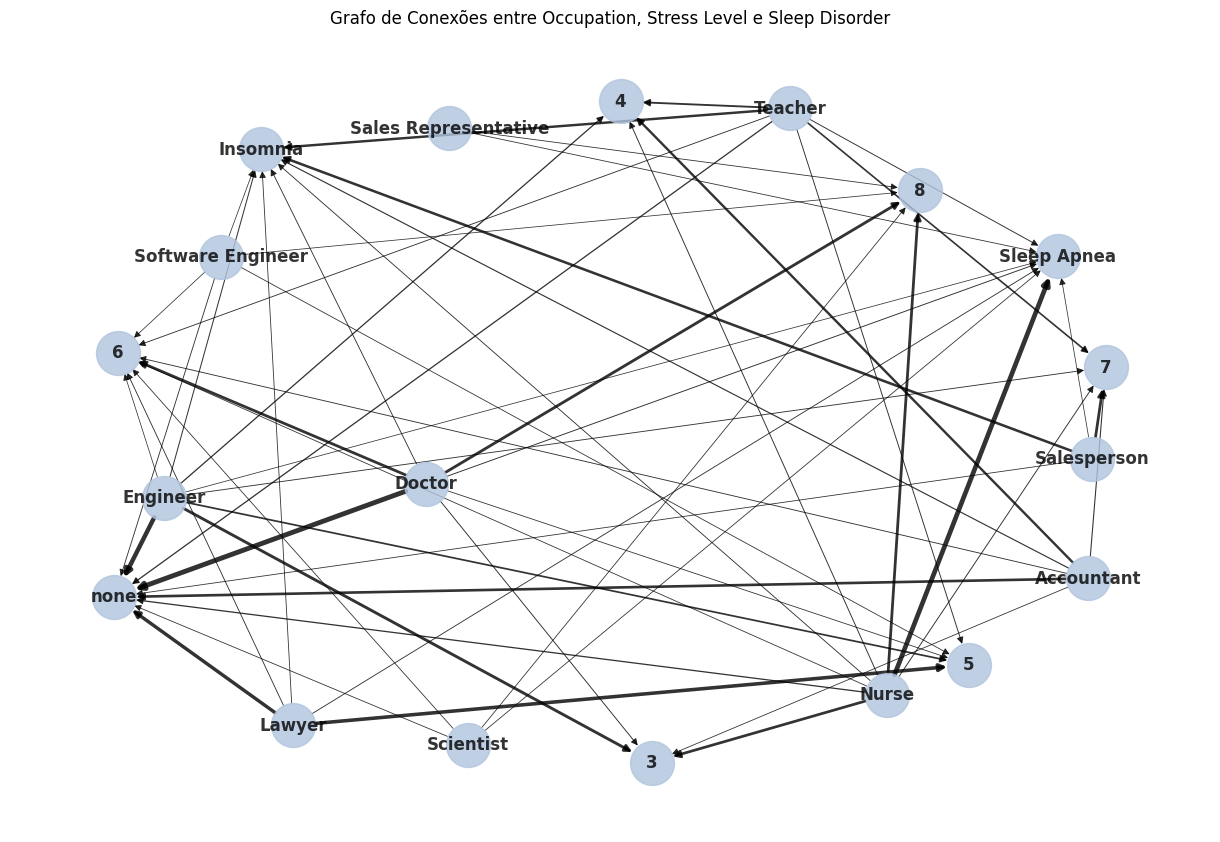

In [21]:
#Grafo de ocupação nivel de estresse e disturbio
grafoNivelDeEstesse = nx.DiGraph()

grafoNivelDeEstesse.add_nodes_from(dataBase['Occupation'])
grafoNivelDeEstesse.add_nodes_from(dataBase['Stress Level'])
grafoNivelDeEstesse.add_nodes_from(dataBase['Sleep Disorder'])

edges_occupation_stress_count = dataBase.groupby(['Occupation', 'Stress Level']).size().to_dict()
edges_occupation_disorder_count = dataBase.groupby(['Occupation', 'Sleep Disorder']).size().to_dict()

for (occupation, stress), count in edges_occupation_stress_count.items():
    grafoNivelDeEstesse.add_edge(occupation, stress, weight=count)

for (occupation, disorder), count in edges_occupation_disorder_count.items():
    grafoNivelDeEstesse.add_edge(occupation, disorder, weight=count)

edge_weights = [grafoNivelDeEstesse[u][v]['weight'] for u, v in grafoNivelDeEstesse.edges()]
max_weight = max(edge_weights)
edge_widths = [0.5 + 3 * (weight / max_weight) for weight in edge_weights]

plt.figure(figsize=(12, 8))
pos = nx.fruchterman_reingold_layout(grafoNivelDeEstesse, k=8)
nx.draw(grafoNivelDeEstesse, pos, with_labels=True, node_size=1000, node_color='lightsteelblue', font_weight='bold', font_size=12, alpha=0.8, width=edge_widths,edge_color='black', arrows=True)
#edge_labels = nx.get_edge_attributes(grafoNivelDeEstesse, 'weight')
#nx.draw_networkx_edge_labels(grafoNivelDeEstesse, pos, edge_labels=edge_labels)
plt.title('Grafo de Conexões entre Occupation, Stress Level e Sleep Disorder')
plt.show()


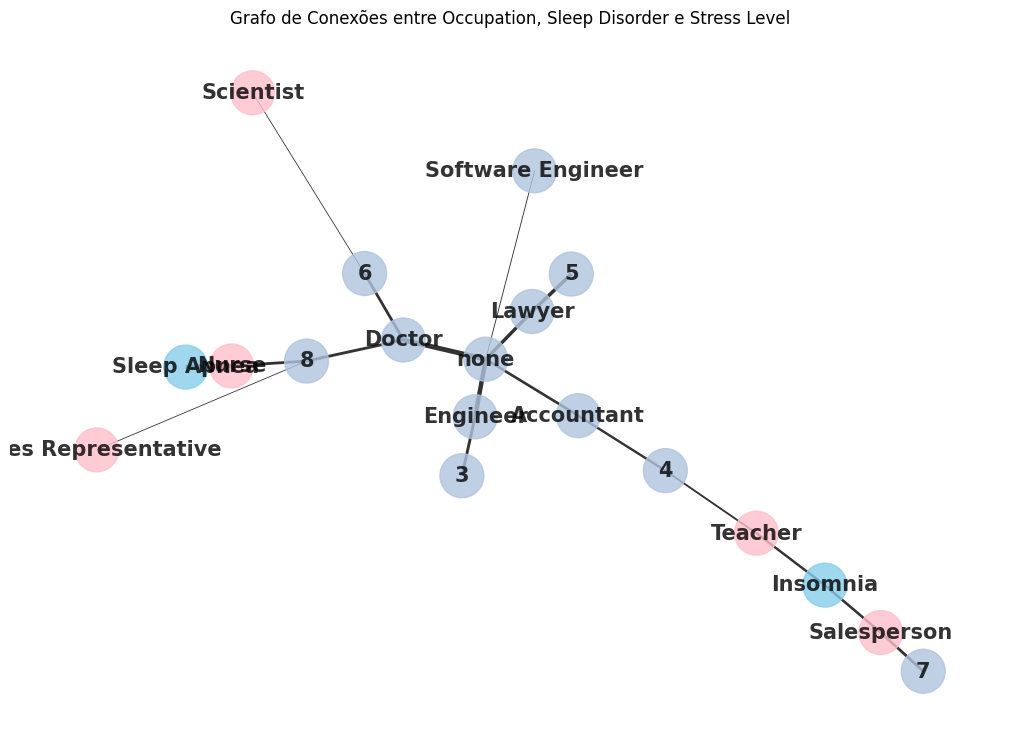

In [22]:
#Grafo da arvores maxima de ocupation, stress e disorder
grafoNivelDeEstesseMST = nx.Graph()

edges_ocupation_stress_count = {}
edges_ocupation_disoder_count = {}

edges = list(zip(dataBase['Occupation'], dataBase['Stress Level']))
edges += list(zip(dataBase['Occupation'], dataBase['Sleep Disorder']))

grafoNivelDeEstesseMST.add_nodes_from(dataBase['Stress Level'])
grafoNivelDeEstesseMST.add_nodes_from(dataBase['Occupation'])
grafoNivelDeEstesseMST.add_nodes_from(dataBase['Sleep Disorder'])

for edge in zip(dataBase['Occupation'], dataBase['Stress Level']):
    edges_ocupation_stress_count[edge] = edges_ocupation_stress_count.get(edge, 0) + 1

for edge in zip(dataBase['Occupation'], dataBase['Sleep Disorder']):
    edges_ocupation_disoder_count[edge] = edges_ocupation_disoder_count.get(edge, 0) + 1

for edge, count in edges_ocupation_stress_count.items():
    grafoNivelDeEstesseMST.add_edge(edge[0], edge[1], weight=count)

for edge, count in edges_ocupation_disoder_count.items():
    grafoNivelDeEstesseMST.add_edge(edge[0], edge[1], weight=count)

tree = nx.maximum_spanning_tree(grafoNivelDeEstesseMST)

edge_weights = [tree[u][v]['weight'] for u, v in tree.edges()]
max_weight = max(edge_weights)
edge_widths = [0.5 + 3 * (weight / max_weight) for weight in edge_weights]

plt.figure(figsize=(10, 7))

node_colors = []

for node in grafoNivelDeEstesseMST.nodes():
    if node in ['Nurse', 'Teacher', 'Salesperson', 'Sales Representative', 'Scientist']:
        node_colors.append('pink')
    elif node in ['Insomnia', 'Sleep Apnea', 'None']:
        node_colors.append('skyblue')
    else:
        node_colors.append('lightsteelblue')

pos = nx.spring_layout(tree, k=0.5)
nx.draw(tree, pos, with_labels=True, node_color=node_colors, node_size=1000, font_weight='bold', font_size=15, alpha=0.8, width=edge_widths, edge_color='black', font_color='black')
plt.title('Grafo de Conexões entre Occupation, Sleep Disorder e Stress Level')
plt.show()
